<a href="https://colab.research.google.com/github/mauro-nievoff/Procesamiento-de-Imagenes/blob/main/TP4_Nievas_Offidani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 4 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

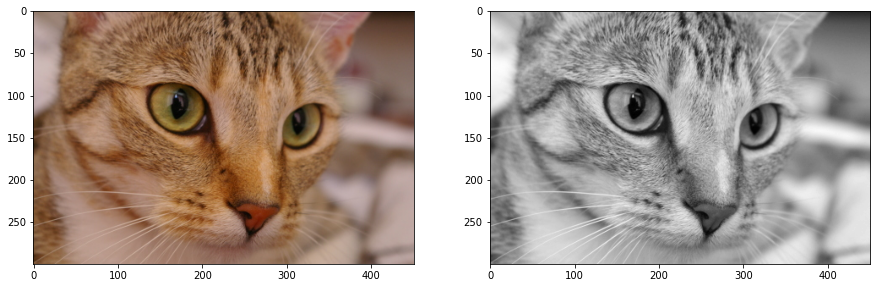

In [3]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

# Transformada Discreta de Fourier

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica

In [4]:
def calcular_espectro(imagen_gris):

  X = np.fft.fftshift(np.fft.fft2(imagen_gris))

  Xm = np.abs(X)
  Xm = np.log(Xm)
  Xm = Xm/Xm.max()

  Xp = np.angle(X)

  dct = {}

  dct['modulo'] = Xm
  dct['fase'] = Xp
  
  return dct

In [5]:
espectro = calcular_espectro(img)

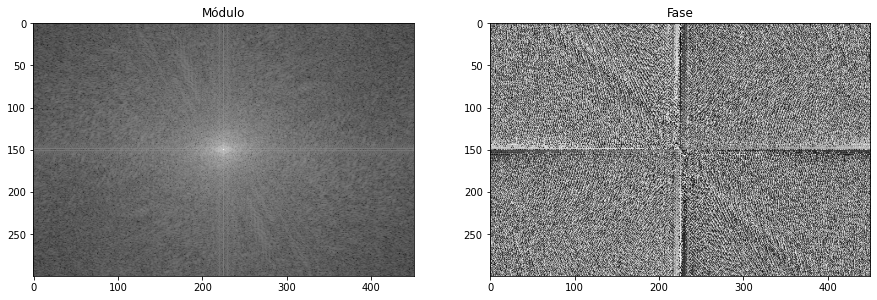

In [6]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].title.set_text('Módulo')
axes[1].title.set_text('Fase')

axes[0].imshow(espectro['modulo'], 'gray')
axes[1].imshow(espectro['fase'], 'gray')

2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible

In [7]:
# Creo una función similar a la anterior pero usando una función logarítmica distinta.

def calcular_transformada(imagen_gris):

  X = np.fft.fftshift(np.fft.fft2(imagen_gris))

  Xm = np.abs(X)
  Xm = (np.log(Xm) / 10) + 1
  Xm = Xm/Xm.max()

  Xp = np.angle(X)

  dct = {}

  dct['modulo'] = Xm
  dct['fase'] = Xp
  
  return dct

In [8]:
transformada = calcular_transformada(img)

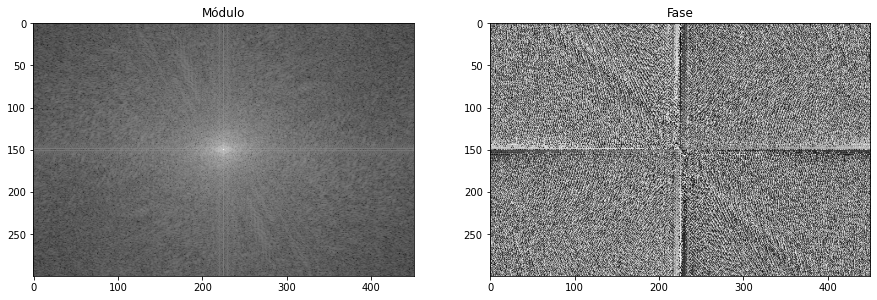

In [9]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].title.set_text('Módulo')
axes[1].title.set_text('Fase')

axes[0].imshow(transformada['modulo'], 'gray')
axes[1].imshow(transformada['fase'], 'gray')

3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 

In [10]:
def calcular_transformada_inversa(transformada):

  Xm_transformada = transformada['modulo']
  Xm = 10 ** ((Xm_transformada - 1) * 10)

  Xp = transformada['fase']

  matriz_compleja = Xm * np.exp(1j*Xp)

  nueva_imagen = np.fft.ifft2(np.fft.ifftshift(matriz_compleja))

  nueva_imagen = np.abs(nueva_imagen)

  return nueva_imagen

In [11]:
nueva_imagen = calcular_transformada_inversa(transformada)

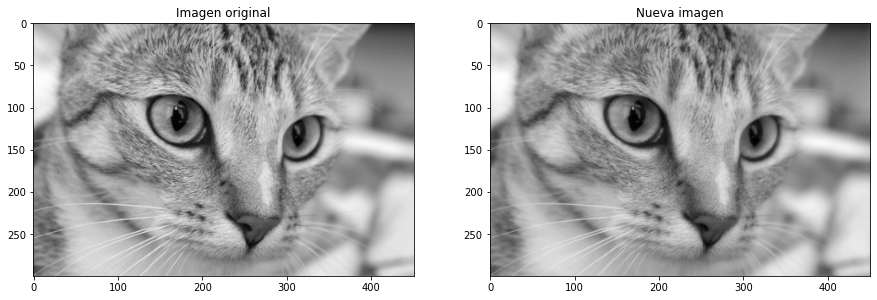

In [12]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].title.set_text('Imagen original')
axes[1].title.set_text('Nueva imagen')

axes[0].imshow(img, 'gray')
axes[1].imshow(nueva_imagen, 'gray')

4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit

In [13]:
error = rmse(img, nueva_imagen)

error

0.4851305535736545

5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


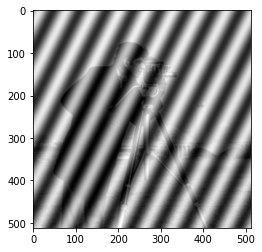

In [15]:
img_tp4_path = '/content/drive/MyDrive/DIM/Procesamiento de Imágenes/Trabajos Prácticos/tp4.png'

img_tp4 = imageio.imread(img_tp4_path)/255

plt.imshow(img_tp4, 'gray')

In [16]:
amp_path = '/content/drive/MyDrive/DIM/Procesamiento de Imágenes/Trabajos Prácticos/tp4_amp.png'

img_tp4_amp = calcular_transformada(img_tp4)['modulo']

imageio.imwrite(amp_path, (img_tp4_amp*255).astype(np.uint8))

In [17]:
phase_path = '/content/drive/MyDrive/DIM/Procesamiento de Imágenes/Trabajos Prácticos/tp4_phase.png'

img_tp4_phase = calcular_transformada(img_tp4)['fase']

imageio.imwrite(phase_path, (img_tp4_phase*255).astype(np.uint8))

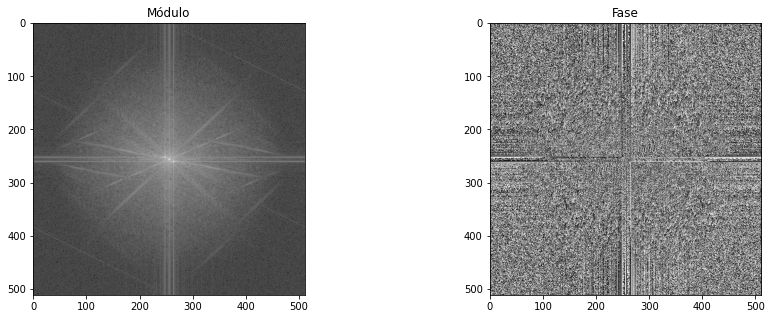

In [18]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].title.set_text('Módulo')
axes[1].title.set_text('Fase')

axes[0].imshow(img_tp4_amp, 'gray')
axes[1].imshow(img_tp4_phase, 'gray')

In [19]:
# Corrijo la imagen tp4_amp.png usando paint y la importo.

amp_path_corregida = '/content/drive/MyDrive/DIM/Procesamiento de Imágenes/Trabajos Prácticos/tp4_amp_corregida.png'

img_tp4_amp_corregida = (imageio.imread(amp_path_corregida)/255)[:,:,0]

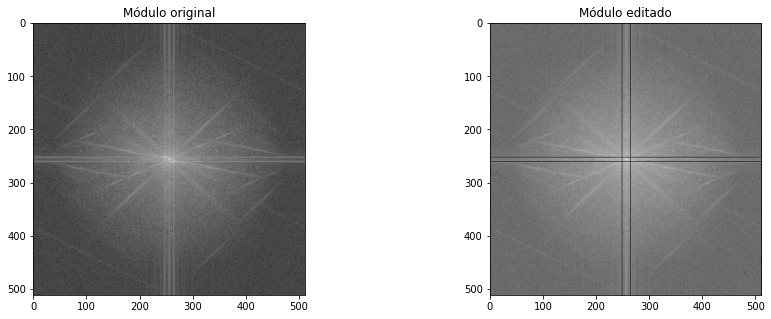

In [20]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].title.set_text('Módulo original')
axes[1].title.set_text('Módulo editado')

axes[0].imshow(img_tp4_amp, 'gray')
axes[1].imshow(img_tp4_amp_corregida, 'gray')

In [21]:
transformada_corregida = {}

transformada_corregida['modulo'] = img_tp4_amp_corregida

transformada_corregida['fase'] = img_tp4_phase

imagen_corregida = calcular_transformada_inversa(transformada_corregida)

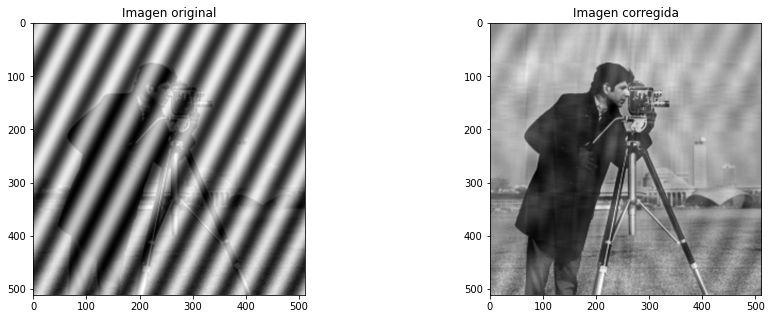

In [22]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].title.set_text('Imagen original')
axes[1].title.set_text('Imagen corregida')

axes[0].imshow(img_tp4, 'gray')
axes[1].imshow(imagen_corregida, 'gray')